<a href="https://colab.research.google.com/github/yeong35/Exercise_DeepLearningFromScratch/blob/master/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

<h1> 계단함수 </h1>

In [12]:
# 실수(부동소수점)만 받는 함수
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [13]:
# numpy도 받을 수 있는 함수
def step_function(x):
  y=x>0                     # boolean형으로 return. 0보다 크면 true, 아니면 false
  return y.astype(np.int)   # true면 1, false면 0

In [14]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [15]:
y = x>0
y

array([False,  True,  True])

In [16]:
step_function(x)

array([0, 1, 1])

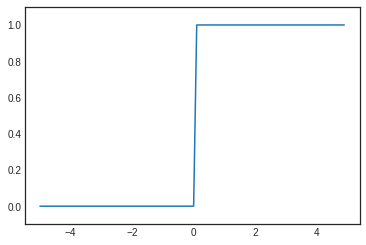

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

<h1> Sigmoid 함수 </h1>

In [18]:
def sigmoid(x):
  return 1/ (1+np.exp(-x))

In [19]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

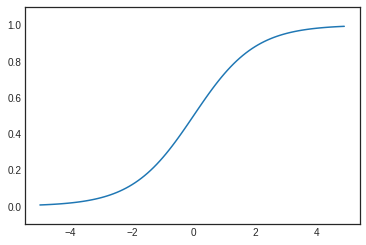

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

<h1> ReLU 함수 </h1>

In [24]:
"""
maximum은 두 입력 값 중 더 큰 값을 선택함
"""
def ReLU(x):
  return np.maximum(0, x)

In [26]:
x = np.array([-5.0, 5.0, 1.0])
ReLU(x)

array([0., 5., 1.])

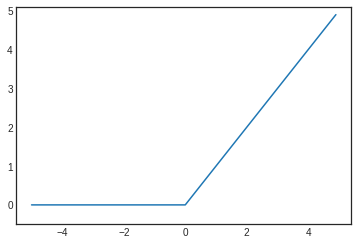

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.1)
plt.show()

<h1>다차원 배열 계산</h1>

In [34]:
A = np.array([1, 2, 3, 4])
print(A)
print()

print(np.ndim(A))  # 배열의 차원 수
print(A.shape)     # 배열의 크기(형상)
print(A.shape[0])  # 

[1 2 3 4]

1
(4,)
4


In [35]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print()

print(np.ndim(B))
print(B.shape)
print(B.shape[0])
print(B.shape[1])

[[1 2]
 [3 4]
 [5 6]]

2
(3, 2)
3
2


In [38]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("A.shape = ", A.shape)
print("B.shape = ", B.shape)
np.dot(A,B)

A.shape =  (2, 2)
B.shape =  (2, 2)


array([[19, 22],
       [43, 50]])

In [39]:
X = np.array([1, 2])
W = np.array([[1, 3, 4], [2, 4, 6]])

Y = np.dot(X, W)
print(Y)

[ 5 11 16]


In [48]:
# 네트워크 구현해보기
def identity_function(a):
  return a

def softmax(a):
  c = np.max(a)    
  exp_a = np.exp(a-c) #overflow방지를 위해 c를 빼준다
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a

  return y

def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [ 0.2, 0.4, 0.6]])   # 1층
  network['b1'] = np.array([0.1, 0.2, 0.3])                       
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 2층
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])              # 3층
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1)+b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2)+b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3)+b3
  y = identity_function(a3)
  
  return y

In [46]:
network = init_network()

x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
